In [1]:
import numpy as np
import pickle
from pathlib import Path

from IPython.display import display
from lib.util_plot import *
from lib.constants import *
from lib.multilevel_analysis import *
from lib.pandas_impl import *
from lib.pandas_stats_VIS import *
from lib.matrix_analyzer import *
from lib.pandas_compute import *

import lib.FLY_preprocessing.fly_constants as FLY

### Data preparation

In [ ]:
data_folder = Path.cwd() / 'data' / 'FLY'
meta_folder = data_folder / 'meta'
eval_folder = Path.cwd() / 'data' / 'eval' / 'FLY_24-12-17_25mu'
eval_folder.mkdir(parents=True, exist_ok=True)
plot_folder = eval_folder / "plots"
plot_folder.mkdir(parents=True, exist_ok=True)

In [3]:
filename = eval_folder / "multilevel_analysis.pkl"
with open(filename, 'rb') as file:
    multilevel_analysis = pickle.load(file)

stats = multilevel_analysis.stats
df_summary = multilevel_analysis.df_summary

In [4]:
pre_ids = set(df_summary.index.get_level_values("pre_id_mapped"))
post_ids = set(df_summary.index.get_level_values("post_id_mapped"))
all_ids = pre_ids.union(post_ids)
all_ids.remove(-1)   
no_presynaptic = all_ids - pre_ids

neuron_domain_pre = get_neuron_to_neuron_domain(df_summary, "pre_celltype", "post_celltype", \
                                                 celltype_order=None, ignored_neuron_ids=[-1])
neuron_domain_post = get_neuron_to_neuron_domain(df_summary, "pre_celltype", "post_celltype", \
                                                  celltype_order=None, ignored_neuron_ids=[-1])

In [5]:
initPlotSettings(False)

In [6]:
df_summary[(df_summary.index.get_level_values("pre_id_mapped") > -1) & (df_summary.index.get_level_values("post_id_mapped") > -1) & (df_summary[EMPIRICAL] > 0)]

,,,,,model-null_group_index,empirical,model-null,num_synaptic_pairs,num_pre_sites,num_post_sites,model-null_preference,model-null_realization,model-P,model-P_preference,model-P_group_index,model-P_realization,model-C,model-C_preference,model-C_group_index,model-C_realization
pre_celltype,post_celltype,pre_id_mapped,post_id_mapped,overlap_volume,,,,,,,,,,,,,,,,
11,7,1,0,25863,25863,1.0,0.000336,11.0,1.0,11.0,1,0,0.002793,8.311491,29100,0,1.0,2976.181818,2092,1
102,7,12,0,25863,25863,1.0,0.000336,11.0,1.0,11.0,1,0,0.009076,27.012376,82459,0,1.0,2976.272727,2171,1


In [7]:
row_markers = {
    "pre_id_mapped" : [1]
}
col_markers = {
    "post_id_mapped" : [0]
}

### Overlapping/connected matrix

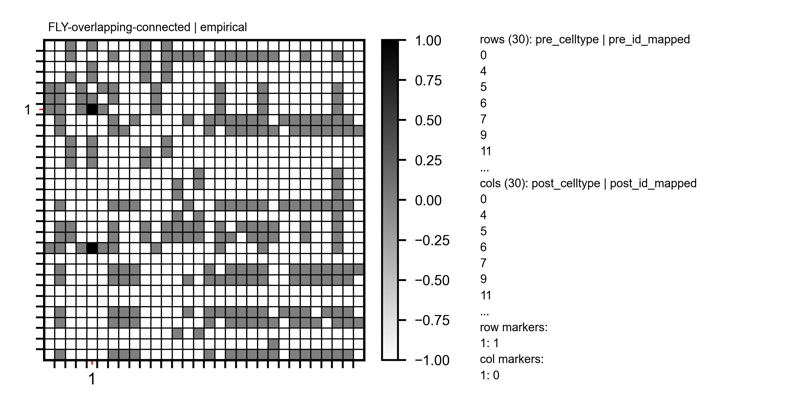

<Figure size 640x480 with 0 Axes>

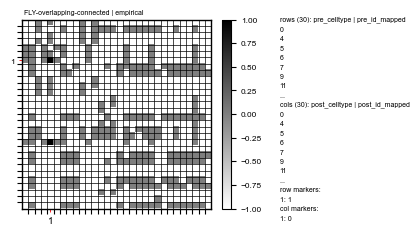

In [8]:
matrix_analyzer = ConnectomeMatrixAnalyzer(df_summary, plot_folder)
matrix_analyzer.set_selection()
matrix_analyzer.set_data_columns(EMPIRICAL)
matrix_analyzer.build_matrix(["pre_celltype", "pre_id_mapped"], 
                             ["post_celltype", "post_id_mapped"],    
                             row_domains = neuron_domain_pre,  
                             col_domains = neuron_domain_post,
                             value_label_map = {},
                             aggregation_fn="sum",
                             default_value=-1)
matrix_analyzer.colormaps["binary"].set_under("white")
matrix_analyzer.render_matrix("FLY-overlapping-connected", 
                              colormap_name="binary", vmin=-1, vmax=1, normalization_function=None, 
                              row_markers=row_markers, col_markers=col_markers,
                              col_separator_lines=True, row_separator_lines=True, high_res=False)

### Specificity parameters matrix

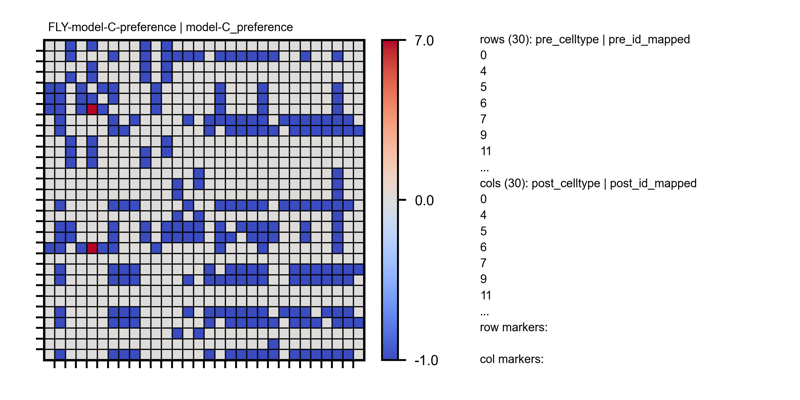

<Figure size 640x480 with 0 Axes>

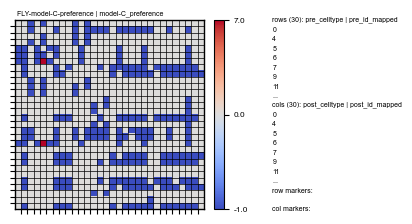

In [9]:
matrix_analyzer = ConnectomeMatrixAnalyzer(df_summary, plot_folder)
matrix_analyzer.set_selection(exclude_filter={})
matrix_analyzer.set_data_columns("model-C_preference")
matrix_analyzer.build_matrix(["pre_celltype", "pre_id_mapped"], 
                             ["post_celltype", "post_id_mapped"],    
                             row_domains = neuron_domain_pre,  
                             col_domains = neuron_domain_post,
                             value_label_map = {},
                             aggregation_fn="mean",
                             default_value=1)
matrix_analyzer.render_matrix("FLY-model-C-preference", 
                              colormap_name="coolwarm", vmin=-1, vmax=1, normalization_function=NormalizePreferenceValue(0, 8),
                              col_separator_lines=True, row_separator_lines=True, high_res=False)